In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
ds = load_dataset("QuyenAnhDE/Diseases_Symptoms")
print("Dataset structure:")
print(ds)

README.md:   0%|          | 0.00/381 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


Diseases_Symptoms.csv:   0%|          | 0.00/107k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/400 [00:00<?, ? examples/s]

Dataset structure:
DatasetDict({
    train: Dataset({
        features: ['Code', 'Name', 'Symptoms', 'Treatments'],
        num_rows: 400
    })
})


In [8]:
# Basic information about the dataset
print("\nDataset Info:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Code        400 non-null    int64 
 1   Name        400 non-null    object
 2   Symptoms    400 non-null    object
 3   Treatments  399 non-null    object
dtypes: int64(1), object(3)
memory usage: 12.6+ KB
None

Missing values:
Code          0
Name          0
Symptoms      0
Treatments    1
dtype: int64


In [9]:
# Analyze unique values in each column
print("\nUnique values in each column:")
for column in df.columns:
    print(f"\n{column}:")
    print(f"Number of unique values: {df[column].nunique()}")
    print(f"Sample values: {df[column].unique()[:5]}")


Unique values in each column:

Code:
Number of unique values: 400
Sample values: [1 2 3 4 5]

Name:
Number of unique values: 392
Sample values: ['Panic disorder' 'Vocal cord polyp' 'Turner syndrome' 'Cryptorchidism'
 'Ethylene glycol poisoning-1']

Symptoms:
Number of unique values: 395
Sample values: ['Palpitations, Sweating, Trembling, Shortness of breath, Fear of losing control, Dizziness'
 'Hoarseness, Vocal Changes, Vocal Fatigue'
 'Short stature, Gonadal dysgenesis, Webbed neck, Lymphedema'
 'Absence or undescended testicle(s), empty scrotum, smaller or underdeveloped testicle(s), inguinal hernia, abnormal positioning of the testicle(s) (higher in the groin area)'
 'Nausea, vomiting, abdominal pain, General malaise, weakness, Increased thirst, frequent urination']

Treatments:
Number of unique values: 386
Sample values: ['Antidepressant medications, Cognitive Behavioral Therapy, Relaxation Techniques'
 'Voice Rest, Speech Therapy, Surgical Removal'
 'Growth hormone therapy, Estr

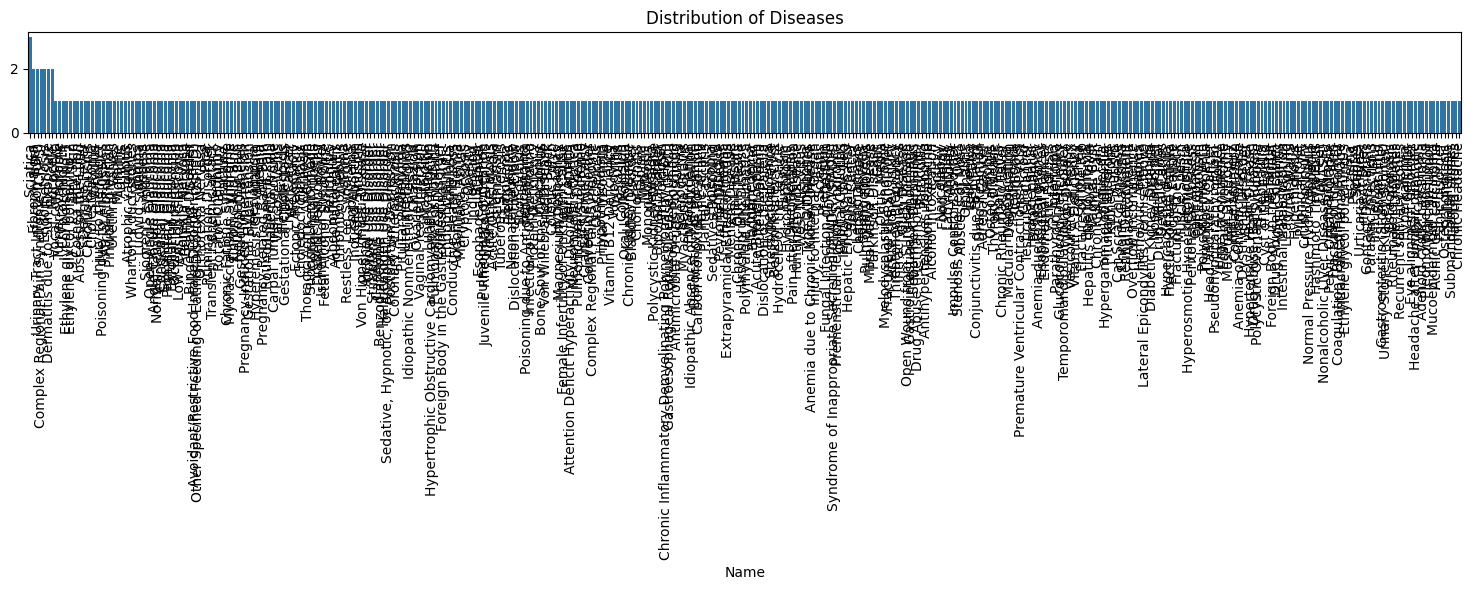

In [10]:
# Analyze disease (Name) distribution
plt.figure(figsize=(15, 6))
disease_counts = df['Name'].value_counts()
sns.barplot(x=disease_counts.index, y=disease_counts.values)
plt.xticks(rotation=90)
plt.title('Distribution of Diseases')
plt.tight_layout()
plt.show()

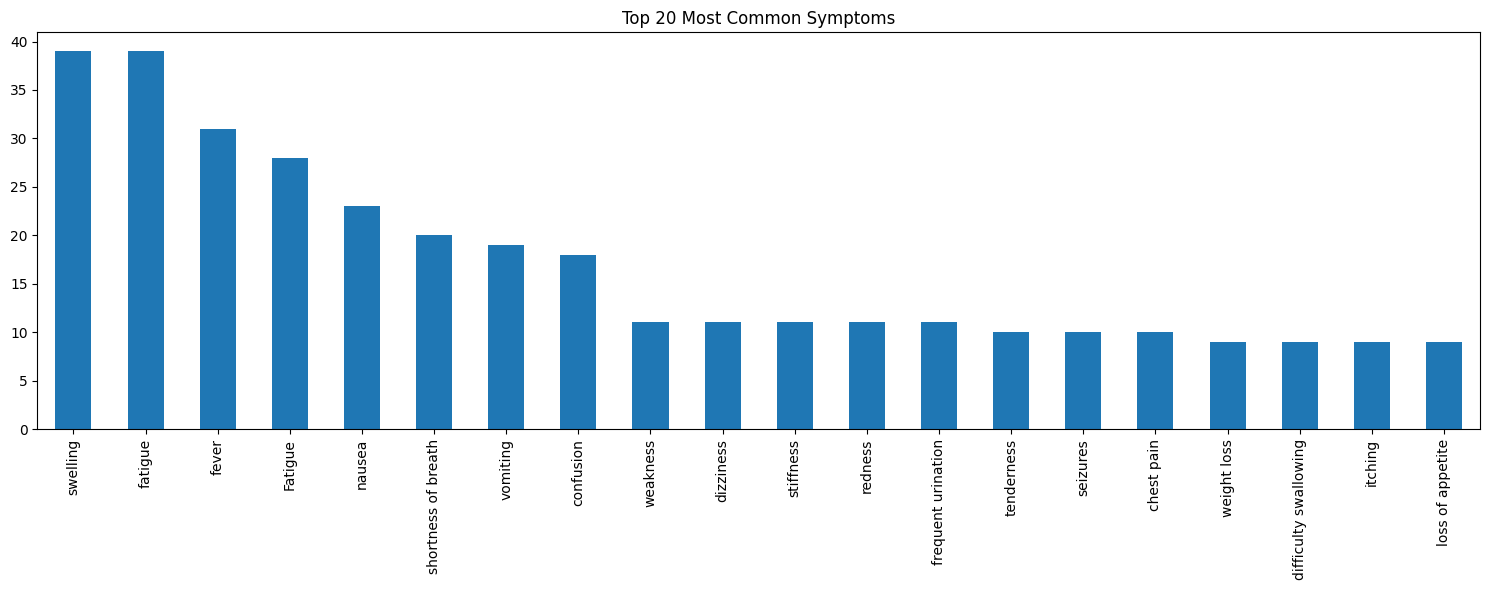

In [11]:
# Analyze symptoms
# First, let's split the symptoms into individual symptoms
all_symptoms = []
for symptoms in df['Symptoms']:
    if isinstance(symptoms, str):
        all_symptoms.extend([s.strip() for s in symptoms.split(',')])

# Count symptom frequencies
symptom_counts = pd.Series(all_symptoms).value_counts()

# Plot top 20 most common symptoms
plt.figure(figsize=(15, 6))
symptom_counts.head(20).plot(kind='bar')
plt.title('Top 20 Most Common Symptoms')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

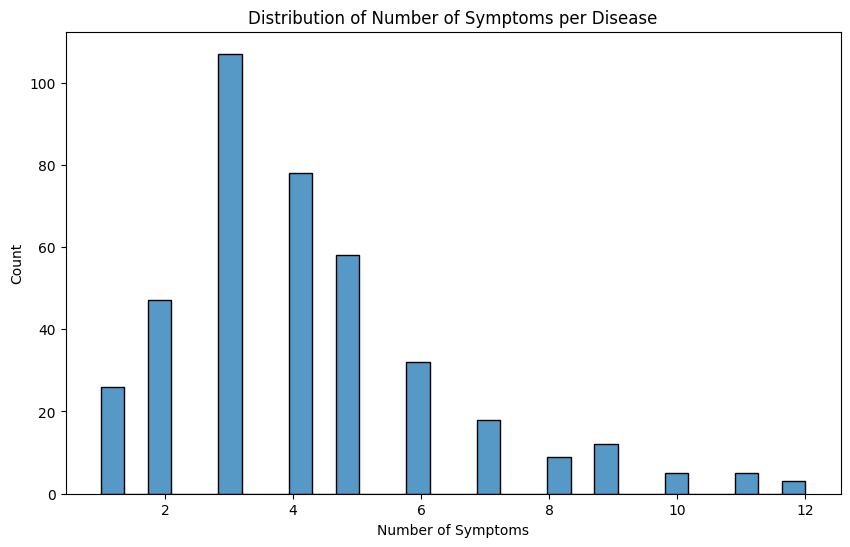

In [13]:
# Analyze number of symptoms per disease
df['symptom_count'] = df['Symptoms'].str.count(',') + 1
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='symptom_count', bins=30)
plt.title('Distribution of Number of Symptoms per Disease')
plt.xlabel('Number of Symptoms')
plt.ylabel('Count')
plt.show()

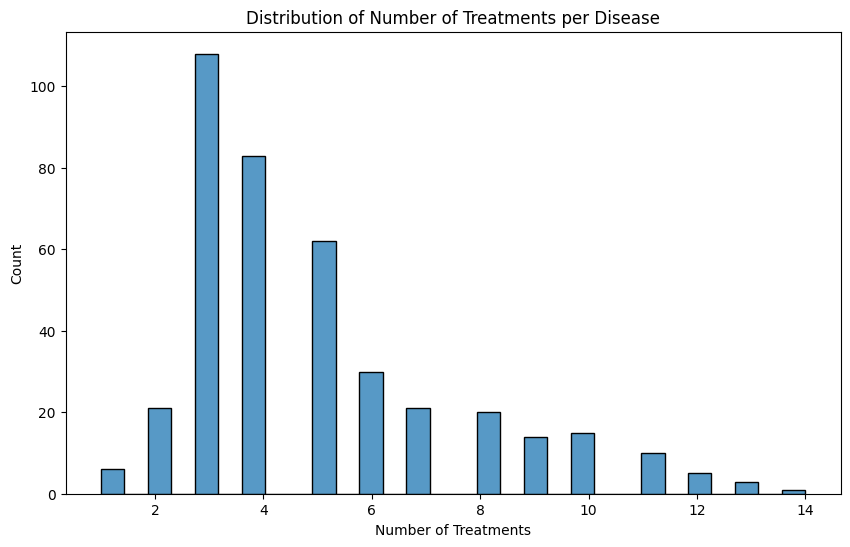

In [14]:
# Analyze treatments
# Count number of treatments per disease
df['treatment_count'] = df['Treatments'].str.count(',') + 1
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='treatment_count', bins=30)
plt.title('Distribution of Number of Treatments per Disease')
plt.xlabel('Number of Treatments')
plt.ylabel('Count')
plt.show()

In [15]:
# Save the processed dataset
df.to_csv('../dataset/diseases_symptoms.csv', index=False)
print("Dataset saved to '../dataset/diseases_symptoms.csv'")

Dataset saved to '../dataset/diseases_symptoms.csv'
